In [114]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [115]:
from modules.fm_functions import *
import seaborn as sns

In [116]:
import pandas as pd
combined_data_2022 = pd.read_csv('./data/2022_combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)
combined_data_2023 = pd.read_csv('./data/2023_combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [117]:
def smith_waterman(s1, s2, match_score=2, gap_cost=1):
    """
    Compute the Smith-Waterman score between two strings.
    
    :param s1: First string.
    :param s2: Second string.
    :param match_score: Score for character match.
    :param gap_cost: Cost for gap (insertion/deletion).
    :return: The Smith-Waterman score for the best local alignment.
    """
    m, n = len(s1), len(s2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if s1[i - 1] == s2[j - 1] else -match_score)
            delete = score_matrix[i - 1][j] - gap_cost
            insert = score_matrix[i][j - 1] - gap_cost
            score_matrix[i][j] = max(0, match, delete, insert)
            max_score = max(max_score, score_matrix[i][j])

    return max_score

def find_most_similar_strings(target, strings, n=5):
    """
    Find the n most similar strings to the target string from a list of strings using Smith-Waterman score.
    
    :param target: The target string to compare against.
    :param strings: A list of strings to search within.
    :param n: The number of most similar strings to return. Default is 5.
    :return: A list of the n most similar strings.
    """
    # Compute the Smith-Waterman score for each string in the list
    scores = [(string, smith_waterman(target, string)) for string in strings]
    
    # Find the n strings with the highest scores
    most_similar = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    
    # Extract and return only the strings (not the scores)
    return [string for string, score in most_similar]

## PCA

<Axes: >

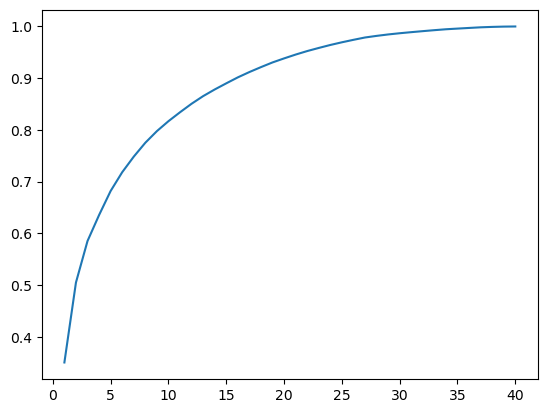

In [118]:
from sklearn.decomposition import PCA

pca_results = {n_components:PCA(n_components=n_components).fit(combined_data_2023[all_stats_columns]).explained_variance_ratio_.sum() \
               for n_components in range(1,len(all_stats_columns))}

sns.lineplot(pca_results)

In [173]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(combined_data_2023[all_stats_columns])
pca_result = pd.DataFrame(pca_result, index=combined_data_2023.index)

## Similarity matrix

In [174]:
from sklearn.preprocessing import MinMaxScaler
pca_result_scaled = MinMaxScaler().fit_transform(pca_result)
pca_result_scaled = pd.DataFrame(pca_result_scaled, index=pca_result.index)

In [182]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# similarity_matrix = cosine_similarity(pca_result_scaled)
similarity_matrix = euclidean_distances(pca_result_scaled)
similarity_matrix = pd.DataFrame(similarity_matrix, index=combined_data_2023.index, columns=combined_data_2023.index)

In [183]:
find_most_similar_strings('Frenkie De Jong', combined_data_2023.index, n=10)

['Frenkie de Jong',
 'Koni De Winter',
 'Charles De Ketelaere',
 'Lorenzo De Silvestri',
 'Grégoire Defrel',
 'Rodrigo De Paul',
 'Morten Frendrup',
 'Curtis Jones',
 'Kevin De Bruyne',
 'Ousmane Dembélé']

In [202]:
# similarity_matrix.loc['Frenkie de Jong'].sort_values(ascending=False)[1:21]
similarity_matrix.loc['Liberato Cacace'].sort_values(ascending=True)[1:21]

Name
Mërgim Vojvoda         0.114618
Johan Mojica           0.155593
Frenkie de Jong        0.164202
Filippo Terracciano    0.168975
Azzedine Ounahi        0.173853
Antonee Robinson       0.174288
Moi Gómez              0.177198
Ricardo Rodríguez      0.185934
Milan Badelj           0.191371
Kevin Kampl            0.204641
Pep Chavarría          0.206472
Jordan Ferri           0.207745
Nemanja Matić          0.208409
Matteo Ruggeri         0.211572
Mário Rui              0.213736
Rodrigo De Paul        0.221681
Toma Bašić             0.222728
Anthony Caci           0.222967
Antonino Gallo         0.224926
Billy Gilmour          0.226396
Name: Liberato Cacace, dtype: float64

<Axes: >

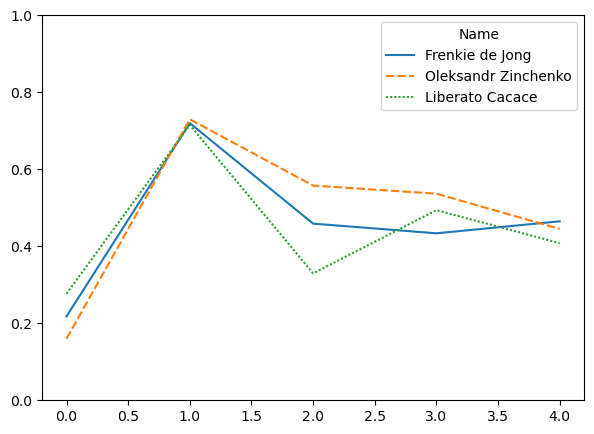

In [201]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_ylim(0,1)
sns.lineplot(data=pca_result_scaled.loc[['Frenkie de Jong', 'Oleksandr Zinchenko', 'Liberato Cacace']].T, ax=ax)


In [ ]:
pca_result.sort_values(9)

,0,1,2,3,4,5,6,7,8,9
Name,,,,,,,,,,
Sven Michel,1.596727,-0.108181,0.390198,0.142244,-0.412199,0.202568,0.352344,0.793794,0.279122,-0.725673
Lucas Ocampos,0.833378,0.650925,0.100488,-0.648745,0.680737,-0.289748,-0.084408,0.264597,-0.543274,-0.691679
Pavel Kadeřábek,0.168263,-0.224505,-0.172015,0.606167,0.290949,-0.313719,0.579426,0.088455,0.155548,-0.676844
Charles De Ketelaere,1.462730,0.674394,0.156669,-0.806421,0.481142,0.128098,-0.182010,0.280347,-0.287320,-0.666976
Matteo Ruggeri,-0.592365,0.251066,-0.498616,0.184101,0.110193,-0.130393,0.214962,0.238411,0.102820,-0.645761
...,...,...,...,...,...,...,...,...,...,...
Julián Álvarez,0.760758,-0.501523,-0.290919,0.685358,0.428161,-0.151061,0.054159,-0.122690,0.190397,0.637419
Patric Pfeiffer,-0.854909,-0.476240,0.384955,-0.041637,-0.350015,0.469473,0.581119,0.153693,0.114927,0.693641
Arsen Zakharyan,0.900965,0.372534,-0.284651,0.408510,0.008185,0.204457,0.180074,-0.145473,-0.039448,0.844485
